## PART 1: Data Processing

#### Load data

In [756]:
#import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [758]:
#mrkt_df = pd.read_csv('/Users/anish/OneDrive - Dickinson College/Documents/GitHub/DATA300-Group-Project/marketing_campaign.csv', sep=',')

In [760]:
mrkt_df = pd.read_csv('/Users/tu/Library/CloudStorage/OneDrive-DickinsonCollege/Junior/SPRING25/DATA300/Group-Project/marketing_campaign.csv', sep=',')

In [762]:
mrkt_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


#### Cleaning the dataset

In [765]:
print("Dimension of the data: ", mrkt_df.shape)
no_of_rows = mrkt_df.shape[0]
no_of_columns = mrkt_df.shape[1]
print(f'No. of Rows: {no_of_rows}')
print(f'No. of Columns: {no_of_columns}')

Dimension of the data:  (2240, 29)
No. of Rows: 2240
No. of Columns: 29


In [767]:
#check income column
mrkt_df['Income']

0       58138.0
1       46344.0
2       71613.0
3       26646.0
4       58293.0
         ...   
2235    61223.0
2236    64014.0
2237    56981.0
2238    69245.0
2239    52869.0
Name: Income, Length: 2240, dtype: float64

In [769]:
# Write a function to count NA cells in income column
def NaCount(dataFrame, columnName):
   count = dataFrame[columnName].isna().sum()
   return count
count = NaCount(mrkt_df, 'Income')
print(f'Number of missing values in Income Column: {count}')

Number of missing values in Income Column: 24


In [771]:
#dropping the missing value rows
mrkt_df = mrkt_df.dropna(subset=['Income'])

#### Normalizing income variable

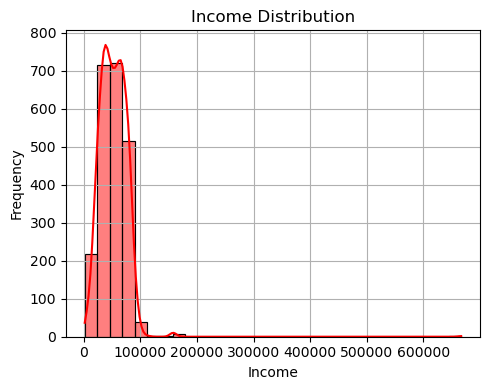

In [774]:
#check distribution of income variable
plt.figure(figsize=(5, 4))
sns.histplot(mrkt_df['Income'], kde=True, bins=30, color='red', edgecolor='black')

plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

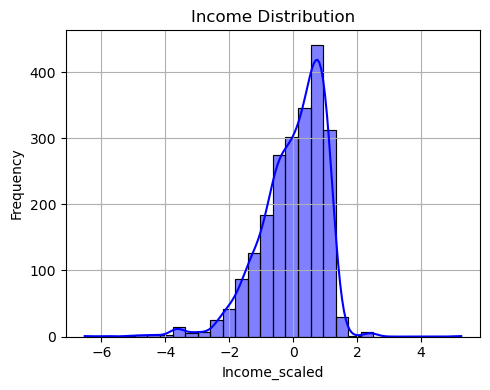

In [775]:
#since histogram appears right-skewed, we use log transformation to normalize the income
mrkt_df['Income_log'] = np.log1p(mrkt_df['Income'])
#standardize
scaler = StandardScaler()
mrkt_df['Income_scaled'] = scaler.fit_transform(mrkt_df[['Income_log']])

#check distribution of income variable
plt.figure(figsize=(5, 4))
sns.histplot(mrkt_df['Income_scaled'], kde=True, bins=30, color='blue', edgecolor='black')
plt.title('Income Distribution')
plt.xlabel('Income_scaled')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

Disproportion in the number of observations that response Yes and No shows the need to apply resampling to reduce the imbalance result.

In [778]:
#Convert Dt_Customer to date column
mrkt_df['Dt_Customer'] = pd.to_datetime(mrkt_df['Dt_Customer'], format="%d-%m-%Y")

In [779]:
mrkt_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Income_log,Income_scaled
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,10.970592,0.428623
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,10.743869,-0.019686
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,11.179046,0.840808
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,10.190432,-1.114019
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,10.973254,0.433888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,3,11,0,11.022295,0.530857
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,1,0,0,3,11,0,11.066873,0.619003
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,1,0,0,0,0,3,11,0,10.950491,0.388876
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,3,11,0,11.145421,0.774319


#### Only Numerical Dataset

In [783]:
num_df = mrkt_df[['Year_Birth', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
        'Income_scaled','Response']]
num_df

,Year_Birth,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Income_scaled,Response
0,1957,58,635,88,546,172,88,88,3,8,10,4,7,0.428623,1
1,1954,38,11,1,6,2,1,6,2,1,1,2,5,-0.019686,0
2,1965,26,426,49,127,111,21,42,1,8,2,10,4,0.840808,0
3,1984,26,11,4,20,10,3,5,2,2,0,4,6,-1.114019,0
4,1981,94,173,43,118,46,27,15,5,5,3,6,5,0.433888,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,46,709,43,182,42,118,247,2,9,3,4,5,0.530857,0
2236,1946,56,406,0,30,0,0,8,7,8,2,5,7,0.619003,0
2237,1981,91,908,48,217,32,12,24,1,2,3,13,6,0.388876,0
2238,1956,8,428,30,214,80,30,61,2,6,5,10,3,0.774319,0


#### Encoding categorical variables

In [787]:
#list of categorical values
category_cols = mrkt_df.select_dtypes(include='object').columns
print("Categorical columns:\n", category_cols)

Categorical columns:
 Index(['Education', 'Marital_Status'], dtype='object')


In [789]:
#Label Encoding: Education (since its ordinal)
education_order = ['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']
mrkt_df['Education_encoded'] = mrkt_df['Education'].astype(pd.CategoricalDtype(categories=education_order, ordered=True)).cat.codes

In [791]:
#Marital Status: Group some strange categories together
mrkt_df['Marital_Status_Clean'] = mrkt_df['Marital_Status'].replace({
    'Alone': 'Single',
    'YOLO': 'Single',
    'Absurd': 'Other',
    'Widow': 'Other'
})

In [793]:
#One-Hot Encoding for marital status
marital_dummies = pd.get_dummies(mrkt_df['Marital_Status_Clean'], prefix='Marital', dtype=int)
mrkt_df = pd.concat([mrkt_df, marital_dummies], axis=1)


In [795]:
mrkt_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Response,Income_log,Income_scaled,Education_encoded,Marital_Status_Clean,Marital_Divorced,Marital_Married,Marital_Other,Marital_Single,Marital_Together
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,1,10.970592,0.428623,2,Single,0,0,0,1,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,10.743869,-0.019686,2,Single,0,0,0,1,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,11.179046,0.840808,2,Together,0,0,0,0,1
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,10.190432,-1.114019,2,Together,0,0,0,0,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,10.973254,0.433888,4,Married,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,11.022295,0.530857,2,Married,0,1,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,11.066873,0.619003,4,Together,0,0,0,0,1
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,10.950491,0.388876,2,Divorced,1,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,11.145421,0.774319,3,Together,0,0,0,0,1


In [797]:
#Numerical columns only
category = mrkt_df.drop(['Education', 'Marital_Status', 'Income','Dt_Customer','Income_log','Marital_Status_Clean','Z_CostContact',
                         'Z_Revenue','Year_Birth', 'Recency', 'MntWines',
                         'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                         'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                         'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
                         'Income_scaled', 'ID'], axis=1)
category

,Kidhome,Teenhome,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Education_encoded,Marital_Divorced,Marital_Married,Marital_Other,Marital_Single,Marital_Together
0,0,0,0,0,0,0,0,0,1,2,0,0,0,1,0
1,1,1,0,0,0,0,0,0,0,2,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,2,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,4,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,1,0,0,0,0,0,0,0,2,0,1,0,0,0
2236,2,1,0,0,0,1,0,0,0,4,0,0,0,0,1
2237,0,0,0,1,0,0,0,0,0,2,1,0,0,0,0
2238,0,1,0,0,0,0,0,0,0,3,0,0,0,0,1


## Part 2: Feature Selection

In this project, we want our features to be our customers' information (income, purchasing history, etc).

#### Check for correlation numerical

In [802]:
most_correlated_num = num_df.corr().abs()['Response'].sort_values(ascending=False)
print("Most Correlated Features:\n")
print(most_correlated_num)


Most Correlated Features:

Response               1.000000
MntWines               0.246299
MntMeatProducts        0.237746
NumCatalogPurchases    0.219914
Recency                0.199766
NumWebPurchases        0.151431
MntGoldProds           0.140332
Income_scaled          0.127392
MntFruits              0.122443
MntSweetProducts       0.116170
MntFishProducts        0.108145
NumStorePurchases      0.036241
Year_Birth             0.023692
NumDealsPurchases      0.003451
NumWebVisitsMonth      0.002209
Name: Response, dtype: float64


#### Correlation for category 

In [805]:
most_correlated_cat = category.corr().abs()['Response'].sort_values(ascending=False)
print("Most Correlated Features:\n")
print(most_correlated_cat)

Most Correlated Features:

Response             1.000000
AcceptedCmp5         0.323374
AcceptedCmp1         0.297345
AcceptedCmp3         0.254005
AcceptedCmp4         0.180205
AcceptedCmp2         0.169294
Teenhome             0.153901
Marital_Single       0.112148
Education_encoded    0.099150
Marital_Married      0.079821
Kidhome              0.077909
Marital_Together     0.075293
Marital_Divorced     0.054189
Marital_Other        0.049881
Complain             0.002029
Name: Response, dtype: float64


In [807]:
# combine categorical and numerical dataset
category

,Kidhome,Teenhome,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Education_encoded,Marital_Divorced,Marital_Married,Marital_Other,Marital_Single,Marital_Together
0,0,0,0,0,0,0,0,0,1,2,0,0,0,1,0
1,1,1,0,0,0,0,0,0,0,2,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,2,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,4,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,1,0,0,0,0,0,0,0,2,0,1,0,0,0
2236,2,1,0,0,0,1,0,0,0,4,0,0,0,0,1
2237,0,0,0,1,0,0,0,0,0,2,1,0,0,0,0
2238,0,1,0,0,0,0,0,0,0,3,0,0,0,0,1


In [809]:
mrkt_df = mrkt_df.drop(['Marital_Status', 'Education', 'Dt_Customer', 'Marital_Status_Clean'], axis = 1)

In [811]:
#Shuffled dataset
shuffle_df = mrkt_df.sample(frac=1,random_state=42).reset_index(drop=True)
shuffle_df.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Z_Revenue,Response,Income_log,Income_scaled,Education_encoded,Marital_Divorced,Marital_Married,Marital_Other,Marital_Single,Marital_Together
0,3635,1962,52597.0,0,1,69,492,0,37,7,...,11,0,10.870433,0.230575,4,0,0,0,1,0
1,3726,1986,34320.0,1,0,66,4,1,9,3,...,11,0,10.443513,-0.613592,4,0,0,0,0,1
2,9080,1972,38578.0,1,1,2,38,4,22,3,...,11,0,10.560463,-0.382341,4,0,0,0,1,0
3,8746,1989,75433.0,1,0,28,800,0,297,0,...,11,0,11.231013,0.943565,2,0,1,0,0,0
4,8079,1982,22448.0,1,0,86,3,1,8,23,...,11,0,10.019001,-1.452996,2,0,1,0,0,0


In [813]:
shuffle_df.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response', 'Income_log', 'Income_scaled',
       'Education_encoded', 'Marital_Divorced', 'Marital_Married',
       'Marital_Other', 'Marital_Single', 'Marital_Together'],
      dtype='object')

#### Assign features and target variable

In [843]:
X = shuffle_df.drop(columns=['ID','Response', 'NumStorePurchases', 'Year_Birth', 'NumDealsPurchases', 'NumWebVisitsMonth', "Complain", "Marital_Other", "Marital_Divorced"])
y = shuffle_df['Response'].to_numpy().reshape(-1,1)

In [845]:
pd.DataFrame(X)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp1,AcceptedCmp2,Z_CostContact,Z_Revenue,Income_log,Income_scaled,Education_encoded,Marital_Married,Marital_Single,Marital_Together
0,52597.0,0,1,69,492,0,37,7,0,42,...,0,0,3,11,10.870433,0.230575,4,0,1,0
1,34320.0,1,0,66,4,1,9,3,0,0,...,0,0,3,11,10.443513,-0.613592,4,0,0,1
2,38578.0,1,1,2,38,4,22,3,3,3,...,0,0,3,11,10.560463,-0.382341,4,0,1,0
3,75433.0,1,0,28,800,0,297,0,34,57,...,1,0,3,11,11.231013,0.943565,2,1,0,0
4,22448.0,1,0,86,3,1,8,23,2,18,...,0,0,3,11,10.019001,-1.452996,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,35544.0,1,0,77,30,5,23,4,1,4,...,0,0,3,11,10.478555,-0.544302,3,0,1,0
2212,65463.0,1,0,17,391,32,70,21,32,16,...,0,0,3,11,11.089256,0.663262,1,1,0,0
2213,33419.0,0,1,76,56,0,12,0,0,18,...,0,0,3,11,10.416910,-0.666195,4,0,1,0
2214,81051.0,0,0,43,1142,29,249,38,29,14,...,0,0,3,11,11.302846,1.085603,4,1,0,0


## Part 3: Modelling

### Splitting dataset into training set

In [849]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
# Get feature column names to reattach after split
feature_cols = shuffle_df.drop(columns=[
   'ID', 'Response', 'NumStorePurchases', 'Year_Birth', 'NumDealsPurchases','NumWebVisitsMonth', "Complain", "Marital_Other", "Marital_Divorced"]).columns

train_df = pd.DataFrame(X_train, columns=feature_cols)
train_df['Response'] = y_train

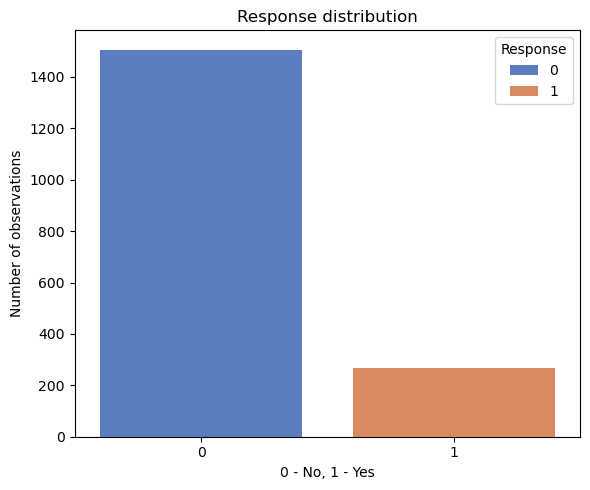

In [851]:
train_df.groupby('Response')

plt.figure(figsize=(6, 5))
sns.countplot(data=train_df, x='Response',  hue='Response', palette='muted')
plt.title('Response distribution')
plt.ylabel('Number of observations')
plt.xlabel('0 - No, 1 - Yes')
plt.tight_layout()
plt.show()

Bar graph shows imbalance in distribution of response variables therefore resampling is required. Method used: Oversampling

In [854]:
#majority and minority classes
majority_class = train_df[train_df['Response'] == 0]
minority_class = train_df[train_df['Response'] == 1]

#Oversample the minority class
minority_upsampled = resample(
    minority_class,
    replace=True,              
    n_samples=len(majority_class), #Match number of majority class
    random_state=42
)
#Combine back into a balanced training set 
train_upsampled = pd.concat([majority_class, minority_upsampled])
train_upsampled = train_upsampled.sample(frac=1, random_state=42)  # Shuffle

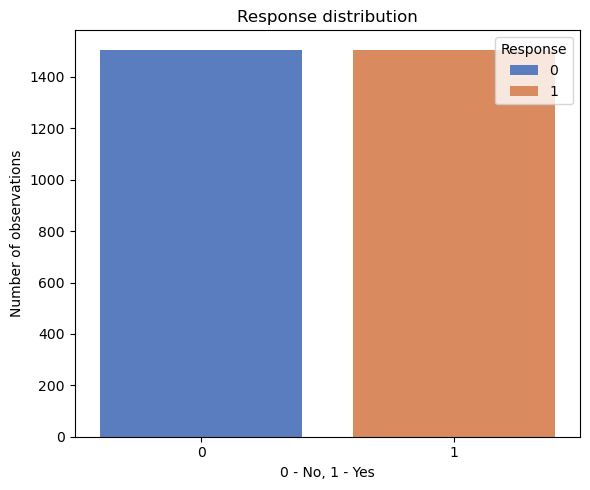

In [856]:
train_upsampled.groupby('Response')

plt.figure(figsize=(6, 5))
sns.countplot(data=train_upsampled, x='Response',  hue='Response', palette='muted')
plt.title('Response distribution')
plt.ylabel('Number of observations')
plt.xlabel('0 - No, 1 - Yes')
plt.tight_layout()
plt.show()

In [873]:
#Split X and y for model training
X_train_balanced = train_upsampled.drop(columns=['Response'])
y_train_balanced = train_upsampled['Response'].to_numpy().reshape(-1, 1).ravel()

## Models

#### Load necessary packages

#### - Logistic Regression

In [864]:
pd.DataFrame(X_train_balanced)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp1,AcceptedCmp2,Z_CostContact,Z_Revenue,Income_log,Income_scaled,Education_encoded,Marital_Married,Marital_Single,Marital_Together
1414,69476.0,0,0,3,260,86,559,63,9,67,...,0,0,3,11,11.148751,0.780904,4,0,0,1
1334,55517.0,1,1,53,483,0,108,0,6,36,...,0,0,3,11,10.924463,0.337410,4,1,0,0
1446,34242.0,0,1,25,8,2,4,0,0,1,...,0,0,3,11,10.441237,-0.618091,3,1,0,0
1855,63342.0,0,1,48,918,21,118,13,10,21,...,0,0,3,11,11.056320,0.598136,4,0,0,1
1475,44964.0,1,1,35,19,1,17,2,0,2,...,0,0,3,11,10.713640,-0.079459,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1765,105471.0,0,0,36,1009,181,104,202,21,207,...,1,0,3,11,11.566201,1.606345,2,0,0,1
1860,34596.0,1,0,48,14,0,2,0,0,7,...,0,0,3,11,10.451522,-0.597755,4,1,0,0
1353,36138.0,1,1,48,130,0,16,0,0,5,...,0,0,3,11,10.495128,-0.511531,3,1,0,0
1378,66000.0,0,0,36,244,51,270,101,0,45,...,0,0,3,11,11.097425,0.679416,3,0,0,1


In [866]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, classification_report,confusion_matrix

import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress the ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

# Train logreg on balanced data
logreg = LogisticRegression(max_iter=2000, random_state=42)  # Increase max_iter to ensure convergence
logreg.fit(X_train_balanced, y_train_balanced.ravel())

# Predictions
y_pred_log = logreg.predict(X_test)

# Model Evaluation

# confusion matrix
print("Confusion matrix")
print(confusion_matrix(y_test, y_pred_log))



Confusion matrix
[[289  88]
 [ 15  52]]


In [868]:
# accuracy, precision, recall, f1
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.95      0.77      0.85       377
           1       0.37      0.78      0.50        67

    accuracy                           0.77       444
   macro avg       0.66      0.77      0.68       444
weighted avg       0.86      0.77      0.80       444



#### - Random Forest

In [875]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf = RandomForestClassifier()
rf.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier()

In [877]:
# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate accuracy
accuracy = rf.score(X_test, y_test)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.8693693693693694
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       377
           1       0.62      0.36      0.45        67

    accuracy                           0.87       444
   macro avg       0.75      0.66      0.69       444
weighted avg       0.85      0.87      0.85       444



In [879]:
# Feature importances
X_df = pd.DataFrame(X)  # Assuming X is the full feature set used in training
importances = rf.feature_importances_

feature_importance = pd.DataFrame({
    "features": X_df.columns,
    "importance": importances * 100
})

# Sort by importance descending
feature_importance = feature_importance.sort_values(by="importance", ascending=False)
print(feature_importance)


               features  importance
3               Recency   12.703869
9          MntGoldProds    7.727596
6       MntMeatProducts    7.473431
4              MntWines    7.446520
19           Income_log    6.909613
0                Income    6.008211
20        Income_scaled    5.562257
12         AcceptedCmp3    5.210487
8      MntSweetProducts    4.895523
11  NumCatalogPurchases    4.851631
5             MntFruits    4.344472
15         AcceptedCmp1    4.222083
7       MntFishProducts    4.190095
10      NumWebPurchases    3.705818
14         AcceptedCmp5    3.487387
21    Education_encoded    2.562650
2              Teenhome    2.038576
23       Marital_Single    1.802448
1               Kidhome    1.258165
24     Marital_Together    1.224940
22      Marital_Married    1.092669
13         AcceptedCmp4    0.723936
16         AcceptedCmp2    0.557622
18            Z_Revenue    0.000000
17        Z_CostContact    0.000000


### - XGBoost

In [887]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 17.4 MB/s eta 0:00:00


#### Initial fit

In [895]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Instantiate model
xgb_clf = xgb.XGBClassifier(eval_metric='logloss') 

# Fit model
xgb_clf.fit(X_train_balanced, y_train_balanced)

# Predict and Evaluate
y_pred_xgb = xgb_clf.predict(X_test)

print(classification_report(y_test, y_pred_xgb))


              precision    recall  f1-score   support

           0       0.92      0.95      0.93       377
           1       0.65      0.51      0.57        67

    accuracy                           0.89       444
   macro avg       0.78      0.73      0.75       444
weighted avg       0.88      0.89      0.88       444



#### Grid search

In [924]:
params =  {
    'n_estimators': [100,200,300], 
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1], 
    'subsample': [0.8, 1.0], 
    'colsample_bytree': [0.8, 1.0], 
    'gamma': [0,1], 
    'reg_alpha': [0, 0.1], 
    'reg_lambda': [1, 1.5],
}
grid_search = GridSearchCV(
    estimator = xgb_clf, 
    param_grid = params, 
    scoring = 'recall', 
    cv = 5, 
    verbose = 1, 
    n_jobs = -1
)

grid_search.fit(X_train_balanced, y_train_balanced)
print(grid_search.best_params_)

Fitting 5 folds for each of 960 candidates, totalling 4800 fits
{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.8}


In [926]:
best_clf = grid_search.best_estimator_
y_pred_xgb_tune = best_clf.predict(X_test)
print(classification_report(y_test, y_pred_xgb_tune))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       377
           1       0.63      0.54      0.58        67

    accuracy                           0.88       444
   macro avg       0.78      0.74      0.76       444
weighted avg       0.88      0.88      0.88       444



#### Feature Importance

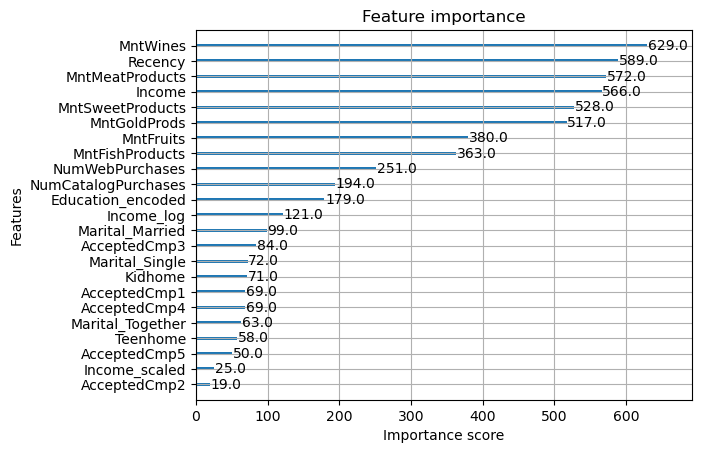

In [911]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(best_clf)
plt.show()

## Part 4: Interpretation